In [1]:
import biocrnpyler as bcp
import numpy as np

In [2]:
#I need 2 regulated promoters to express A and B

#Create a RegulatedPromoter Object named "B_reg" with an "activator"
B_reg = bcp.RegulatedPromoter("B_reg", regulators=["actB"], leak=True)

#also for A
A_reg = bcp.RegulatedPromoter("A_reg", regulators=["actA"], leak=True)



#B will be like ccdB and be some reference species that can be sequestered by the expression of another species
B_assembly = bcp.DNAassembly(name = "B", promoter = B_reg, rbs = "BCD", protein = "B")

#A will sequester B
A_assembly = bcp.DNAassembly(name = "A", promoter = A_reg, rbs = "BCD", protein = "A")

prot_A = A_assembly.protein
prot_B = B_assembly.protein

#now we need the activator proteins for A and B DNA assemblies
actA = bcp.Protein("actA")
actB = bcp.Protein("actB")


#create species that is the complex of A and B together
AB_complex = bcp.ComplexSpecies([prot_A, prot_B], "AB_complex")

#attempt to use the complex to regulate a promoter
P_reg = bcp.RegulatedPromoter("P_regbyAB", regulators=[AB_complex], leak=False)

#use the promoter to make something you can track
report_assembly = bcp.DNAassembly(name = "test_report", promoter = P_reg, rbs = "BCD", protein = "reporter")

In [3]:
#All Necessary Parameters are passed in as a dictionary in the form: (mechanism, part_id, param_name):Val
#These could also be loaded from a file, but are shown here to illustrate the required parameter keys.
parameters = {
    #B promoter Activator Binding Parameters. Note the part_id = [promoter_name]_[regulator_name]
    ('one_step_cooperative_binding', "B_reg_actB", 'kb'):1000, #Promoter - Activator Binding
    ('one_step_cooperative_binding', "B_reg_actB", 'ku'):5.0, #Unbinding
    ('one_step_cooperative_binding',"B_reg_actB", 'cooperativity'):2.0, #Cooperativity
    
    #B activated Promoter Transcription. Note the part_id = [promoter_name]_[regulator_name]
    #These regulate RNAP binding to an activated promoter and transcription
    ('transcription_mm', 'B_reg_actB', 'kb'): 1000.0, #Binding to RNAP
    ('transcription_mm', "B_reg_actB", 'ku'): 10.0, #Unbinding
    ('transcription_mm', 'B_reg_actB', "ktx"): 1.25, #Transcription Rate
    
    #A Promoter activator Binding Parameters. Note the part_id = [promoter_name]_[regulator_name]
    ('one_step_cooperative_binding', 'A_reg_actA', 'kb'):1000,
    ('one_step_cooperative_binding',"A_reg_actA", 'ku'):5.0,
    ('one_step_cooperative_binding',"A_reg_actA", 'cooperativity'):2.0,
    
    #A's activated promoter Transcription. Note the part_id = [promoter_name]_[regulator_name]
    #These regulate RNAP binding to a repressed promoter and transcription
    ('transcription_mm', 'A_reg_actA', 'kb'): 1000.0, #Binding to RNAP
    ('transcription_mm', "A_reg_actA", 'ku'): 10.0, #Unbinding
    ('transcription_mm', 'A_reg_actA', "ktx"): 1.25, #Transcription Rate
    
    #Leak Parameters for transcription
    #These regulate expression of B's unbound promoter
    ('transcription_mm', 'B_reg', "kb"): 100, #Binding to RNAP
    ('transcription_mm', 'B_reg', "ku"): 100, #Unbinding
    ('transcription_mm', 'B_reg', "ktx"): 1., #Transcription Rate
    
    #These regulate expression of A's unbound promoter
    ('transcription_mm', 'A_reg', "kb"): 100, #Binding to RNAP
    ('transcription_mm', 'A_reg', "ku"): 100, #Unbinding
    ('transcription_mm', 'A_reg', "ktx"): 1., #Transcription Rate
    
    
              
    #Translation Parameters:
    ('translation_mm', 'BCD', 'kb'): 50, #Binding to Ribosome
    ('translation_mm', 'BCD', 'ku'): 10.0, #Unbinding
    ('translation_mm', 'BCD', 'ktl'): 2.0, #Translation Rate
    
    #RNA Degredation Parameters
    ("rna_degredation_mm", "kb"): 500, #RNAase-RNA binding (Default for RNA Degredation)
    ("rna_degredation_mm", "ku"): 1.0, #RNAase-RNA unbinding (Default for RNA Degredation)
    ("rna_degredation_mm", "kdeg"): 2.5, #Degredation Rate (Default for RNA Degredation)
    
    #For use with an ExpressionExtract
    ('gene_expression', 'P_reg_repressor', "kexpress"): .05, 
    ('gene_expression', 'P_reg_activator', "kexpress"): 10.,
    ('gene_expression', 'P_reg', "kexpress"): 1.0,
    
    #For the reporter regulated by the complexP_reg.name+'_'+repressor.name
    ('one_step_cooperative_binding', P_reg.name+'_'+AB_complex.name, 'kb'):1000, #Promoter - Activator Binding
    ('one_step_cooperative_binding', P_reg.name+'_'+AB_complex.name, 'ku'):5.0, #Unbinding
    ('one_step_cooperative_binding', P_reg.name+'_'+AB_complex.name, 'cooperativity'):1.0, #Cooperativity
    
    #AB complex activated reporter promoter transcription. Note the part_id = [promoter_name]_[regulator_name]
    #These regulate RNAP binding to an activated promoter and transcription
    ('transcription_mm', P_reg.name+'_'+AB_complex.name, 'kb'): 1000.0, #Binding to RNAP
    ('transcription_mm', P_reg.name+'_'+AB_complex.name, 'ku'): 10.0, #Unbinding
    ('transcription_mm', P_reg.name+'_'+AB_complex.name, "ktx"): 1.25, #Transcription Rate
}

In [4]:
#Create a Mixture
components = [B_assembly, A_assembly, actA, actB, report_assembly]
myMixture = bcp.TxTlExtract(name="txtl", parameters=parameters, components=components, parameter_warnings=True)

In [5]:
myCRN = myMixture.compile_crn()

C:\Users\geeze\anaconda3\lib\site-packages\html5lib\_trie\_base.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
C:\Users\geeze\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\geeze\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\geeze\anaconda3\lib\site-packages\biocrnpyler-0.1-py3.7.egg\biocrnpyler\chemical_reaction_network.py:706: UserWarning: The following species are uninitialized and their value has been defaulted to 0: complex_AB_complex, 


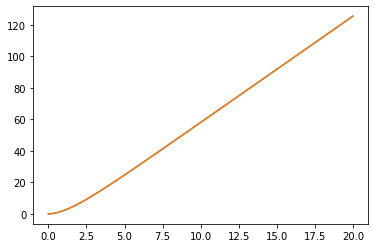

In [6]:
try:
    import pylab as plt
    time = np.arange(0, 20, .01)
    #Simulate the CRN with some activators
    x0 = {"dna_B":10, "dna_A":10, "protein_actA":5, "protein_actB":5, "protein_Ribo":100, "protein_RNAP":20, "protein_RNAase":10}
    R_const = myCRN.simulate_with_bioscrape(time, stochastic = False, initial_condition_dict = x0)
except ModuleNotFoundError:
    pass


plt.figure()
plt.plot(time, R_const["protein_B"])
plt.plot(time, R_const["protein_A"])

# plt.plot(time, R_const["protein_reporter"])